# Lecture 1 — Pattern Recognition & Function Approximation (from Scalars to Vectors & Matrices) & Building the Linear Regression Model from Scratch

Welcome to **Lecture 1** of *Practical Introduction to Machine Learning and Deep Learning*!  
This lecture is part of the **SAIR ML/DL Roadmap & Bootcamp**, and will lay the foundation for everything we’ll build later.

## 🌱 Why This Lecture Matters  

Before we jump into big models and fancy libraries, we must understand the **core idea** behind machine learning:  

> *“We don’t write explicit rules… we let algorithms learn patterns and rules from data.”*

This is what makes ML fundamentally different from traditional programming:  
we don’t tell the computer exactly what to do; instead, it **learns from examples**.

## 📖 Definition (Short)

> **Machine Learning** is a *new programming paradigm* that uses algorithms to **recognize patterns** in data and **approximate functions** that map inputs to outputs.


## 🧠 Let’s Unpack This

- **Programming paradigm:**  
  Traditional programming:  
  $$
  \text{Rules} + \text{Data} \longrightarrow \text{Answer}
  $$  
  Machine learning:  
  $$
  \text{Data} + \text{Answer} \longrightarrow \text{Rules (Model)}
  $$  
  💡 *We let the computer discover the rules from examples.*

- **Pattern recognition:**  
  The model looks at examples and discovers regularities or structure in the data.  
  It learns to generalize from what it sees rather than memorizing.

- **Function approximation:**  
  There exists an unknown mapping \( f(x) \) behind the data.  
  ML builds a parametric function \( f_\theta(x) \) that **approximates** it as closely as possible.  
  💡 *“Why approximate?”* — because the true function is often unknown or too complex to write manually.

- **Algorithms (training):**  
  Algorithms are used to adjust the parameters \( \theta \) so that predictions \( \hat{y} \) get closer to the true outputs \( y \).
 

<details>
<summary>🧾 Whiteboard Cue (click to expand)</summary>

Use the whiteboard to illustrate:

1. **Classical programming vs. ML paradigm**  

2. **What is really Pattern recognition**  

3. **Function approximation and why approx?**  

4. **Conceptual flow diagram:** 

In [2]:
# Example: scalar input and function mapping

# Step 1: Define a single scalar input
x_scalar = 4  # this is our input

# Step 2: Define a function f(x) that maps input to output
def f(x):
    # This is our "model" or function
    # For now, it's just squaring the input
    return x**2

# Step 3: Compute the output for our input
y_scalar = f(x_scalar)

# Step 4: Show the result
print("Input x =", x_scalar)
print("Output y = f(x) =", y_scalar)


Input x = 4
Output y = f(x) = 16


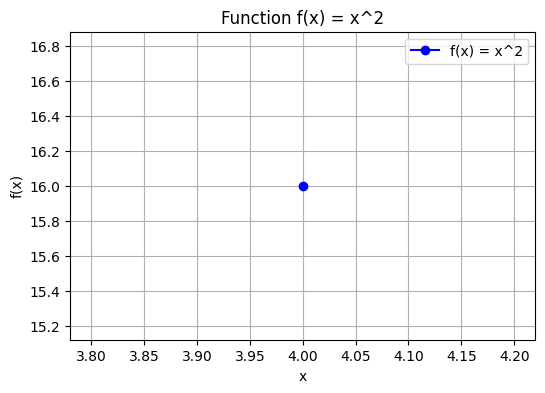

In [3]:
import matplotlib.pyplot as plt
# ----------------------------
# 4️⃣ Plotting the Function
# ----------------------------
plt.figure(figsize=(6,4))
plt.plot(x_scalar, y_scalar, 'o-', color='blue', label='f(x) = x^2')
plt.title("Function f(x) = x^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


## A better way to visualize this is:


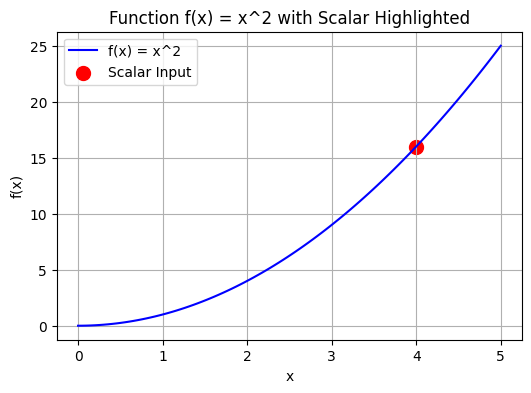

In [4]:
import numpy as np
# ----------------------------
#Same code but we add the np.linspace function from numpy to create a curve
# ----------------------------
x_curve = np.linspace(0, 5, 100)  # 100 points from 0 to 5
y_curve = f(x_curve)

plt.figure(figsize=(6,4))
plt.plot(x_curve, y_curve, color='blue', label='f(x) = x^2')  # full curve
plt.scatter(x_scalar, y_scalar, color='red', s=100, label='Scalar Input')  # single point
plt.title("Function f(x) = x^2 with Scalar Highlighted")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


# From 2D Table to 3D Image Data

SCALAR → VECTOR → MATRIX → TENSOR 

## 3️⃣ Visualizing the Data Hierarchy

To make the progression from **Scalar → Vector → Matrix → Tensor** tangible, see this diagram:

![Data Hierarchy](assets/data_format.jpg)

- **Scalar:** single number  
- **Vector:** 1D array → single data point with multiple features  
- **Matrix:** 2D array → multiple data points × features  
- **Tensor:** 3D or higher → images, videos, sequences

In ML, data comes in various forms. We start with simple **tabular data** and move to **images**, which are essentially **3D arrays**.

---

## 1️⃣ 2D Tabular Data (Matrix)

Imagine a small dataset of 3 people with 3 features:

| Height | Weight | Age |
|--------|--------|-----|
| 180    | 75     | 25  |
| 165    | 60     | 30  |
| 170    | 68     | 28  |

This is a **matrix**: 3 rows (examples) × 3 columns (features).

```



In [5]:
# 2D Tabular Data
people = [
    [180, 75, 25],
    [165, 60, 30],
    [170, 68, 28]
] 


print(people) ## This is a 2D 
print("2D Table (Matrix) of People Data:")
for row in people:
    print(row)


[[180, 75, 25], [165, 60, 30], [170, 68, 28]]
2D Table (Matrix) of People Data:
[180, 75, 25]
[165, 60, 30]
[170, 68, 28]


<div style="text-align: center; font-size: 28px; font-weight: bold;">
2️⃣ 3D Image Data
</div>

<div style="text-align: center; font-size: 20px; margin-top: 10px;">
Now, consider a <b>color image</b>. An image is naturally a <b>3D array</b>:
</div>

<div style="text-align: center; margin-top: 10px;">
<img src="assets/A.png" alt="Data Hierarchy" width="500">
</div>

<div style="text-align: center; font-size: 20px; margin-top: 10px;">
- Height × Width × Channels (RGB)<br>
- Each pixel has 3 values: Red, Green, Blue
</div>


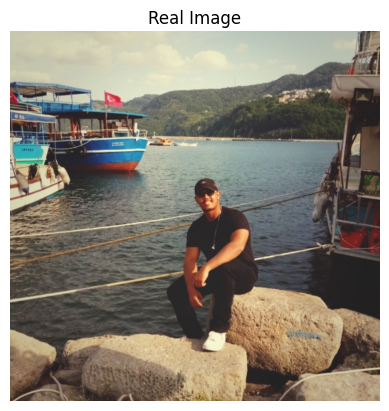


 My Image as a matrix (Height x Width x Channels):
[(200, 198, 173), (200, 198, 173), (200, 198, 173), (200, 198, 173), (200, 198, 173)]
[(200, 198, 173), (200, 198, 173), (200, 198, 173), (200, 198, 173), (200, 198, 173)]
[(200, 198, 173), (200, 198, 173), (200, 198, 173), (200, 198, 173), (200, 198, 173)]
[(200, 198, 173), (200, 198, 173), (200, 198, 173), (200, 198, 173), (200, 198, 173)]
[(200, 198, 173), (200, 198, 173), (200, 198, 173), (200, 198, 173), (200, 198, 173)]

Python list processing took 0.8269 seconds


In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import time

# ----------------------------
# Start Timer
# ----------------------------
start_time = time.time()

# Load image
img = Image.open("assets/ME.jpeg")  
# Keep original size for visualization

# Convert to RGB tuples
img_rgb = list(img.getdata())
width, height = img.size

# Convert to 2D list (Height x Width) with RGB tuples
img_list = []
for i in range(height):
    row = []
    for j in range(width):
        row.append(img_rgb[i*width + j])
    img_list.append(row)

# Show image with matplotlib
plt.imshow(img)
plt.title("Real Image")
plt.axis("off")
plt.show()

# Print only top-left 5x5 pixels to keep it readable
print("\n My Image as a matrix (Height x Width x Channels):")
for i, row in enumerate(img_list[:5]):
    print([row[j] for j in range(5)])

# ----------------------------
# Stop Timer and Display
# ----------------------------
end_time = time.time()
print(f"\nPython list processing took {end_time - start_time:.4f} seconds")


## Can we enhance this code? 
## Write less code ?
## Make it faster ?

## YES , take a look at this:

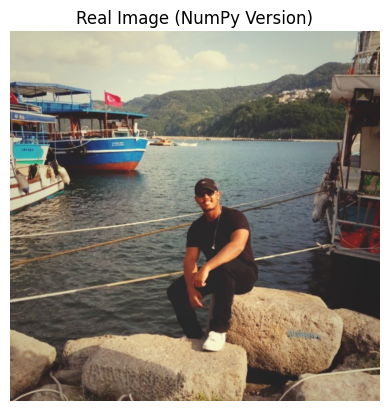


Full image matrix (NumPy Version):
[[[200 198 173]
  [200 198 173]
  [200 198 173]
  ...
  [155 141 115]
  [154 138 113]
  [153 137 112]]

 [[200 198 173]
  [200 198 173]
  [200 198 173]
  ...
  [150 136 110]
  [153 137 112]
  [156 140 115]]

 [[200 198 173]
  [200 198 173]
  [200 198 173]
  ...
  [149 133 107]
  [152 136 110]
  [154 138 112]]

 ...

 [[ 71  50  47]
  [ 67  46  41]
  [ 65  44  39]
  ...
  [160 133 103]
  [164 137 107]
  [168 141 111]]

 [[ 61  37  37]
  [ 74  50  48]
  [ 77  56  51]
  ...
  [159 134 103]
  [161 136 105]
  [164 139 108]]

 [[ 65  41  41]
  [ 70  46  44]
  [ 64  43  40]
  ...
  [165 140 109]
  [166 141 110]
  [169 144 113]]]
(800, 800, 3)

NumPy version took 0.1978 seconds


In [7]:
import numpy as np

# ------------------------------
# NumPy Version
# ------------------------------
start_time = time.time()

# Load image and convert to NumPy array
img_np = np.array(Image.open("assets/ME.jpeg"))

# Show image with matplotlib
plt.imshow(img_np)
plt.title("Real Image (NumPy Version)")
plt.axis("off")
plt.show()

# Print pixel matrix
print("\nFull image matrix (NumPy Version):")
print(img_np)

print(img_np.shape)

numpy_time = time.time() - start_time
print(f"\nNumPy version took {numpy_time:.4f} seconds")


## ⚠️ Why Python Lists and Loops Can Be a Problem in ML

So far, we have been representing images and data using **nested Python lists**:

```python
image_list = [
    [[255, 0, 0], [0, 255, 0]],
    [[0, 0, 255], [255, 255, 0]],
    [[255, 0, 255], [0, 255, 255]]
]
````

We can do operations with **for-loops**, but this approach has **serious limitations**.

---

### 🔹 Problems with Lists + For-Loops

1. **Inefficient for large datasets**

   * Images, videos, and tabular data often have **millions of elements**.
   * Nested loops (`for i in height`, `for j in width`, `for c in channels`) are **slow in Python**.

2. **Complex indexing and slicing**

   * Want a submatrix or a single color channel? It’s **cumbersome and error-prone**.

   ```python
   red_channel = [[pixel[0] for pixel in row[:2]] for row in image_list[:2]]
   ```

3. **No vectorized operations**

   * To increase brightness, you’d need **triple loops**:

   ```python
   for i in range(height):
       for j in range(width):
           for c in range(3):
               image_list[i][j][c] += 50
   ```

4. **Hard to integrate with ML/DL libraries**

   * Libraries like **TensorFlow, PyTorch, and scikit-learn** expect **arrays/tensors**, not nested lists.

5. **General-purpose vs specialized**

   * Python lists are **general data structures**, used for anything: strings, numbers, objects, etc.
   * Example:

   ```python
   person = ["Alice", 25, 1.68]  # string, integer, float
   ```

   * ✅ Flexible
   * ❌ Not optimized for **large numerical computations**

---

### 💡 Why NumPy is Better

NumPy introduces **multi-dimensional arrays (ndarrays)** that:

* Are **memory-efficient**
* Allow **fast vectorized operations** (no explicit loops needed)
* Support **easy slicing, indexing, and broadcasting**
* Integrate seamlessly with ML/DL libraries

```python
import numpy as np

# Convert Python list to NumPy array
image_np = np.array(image_list)

# Increase brightness vectorized
image_np = np.clip(image_np + 50, 0, 255)

# Get top-left 2x2 pixels, red channel
print(image_np[:2, :2, 0])
```

---

### 🔹 Key Intuition

* Python lists are **flexible but slow** for large numerical data.
* NumPy arrays are **optimized for numerical computation**:

  * Stored **contiguously in memory**
  * Use **low-level C operations** for speed
  * Enable **vectorized math on entire arrays at once**

> ✅ For real ML workloads (images, audio, tabular data), **NumPy is the standard starting point**.

```

This now clearly shows why lists are general-purpose**, why they’re slow for ML tasks, and why NumPy is specialized, fast, and essential.  

## ⚠️ Why Python Lists and Loops Can Be a Problem in ML

So far, we have been representing images and data using **nested Python lists**:

```python
image_list = [
    [[255, 0, 0], [0, 255, 0]],
    [[0, 0, 255], [255, 255, 0]],
    [[255, 0, 255], [0, 255, 255]]
]
````

We can do operations with **for-loops**, but this approach has **serious limitations**.

---

### 🔹 Problems with Lists + For-Loops

1. **Inefficient for large datasets**

   * Images, videos, and tabular data often have **millions of elements**.
   * Nested loops (`for i in height`, `for j in width`, `for c in channels`) are **slow in Python**.

2. **Complex indexing and slicing**

   * Want a submatrix or a single color channel? It’s **cumbersome and error-prone**.

   ```python
   red_channel = [[pixel[0] for pixel in row[:2]] for row in image_list[:2]]
   ```

3. **No vectorized operations**

   * To increase brightness, you’d need **triple loops**:

   ```python
   for i in range(height):
       for j in range(width):
           for c in range(3):
               image_list[i][j][c] += 50
   ```

4. **Hard to integrate with ML/DL libraries**

   * Libraries like **TensorFlow, PyTorch, and scikit-learn** expect **arrays/tensors**, not nested lists.

5. **General-purpose vs specialized**

   * Python lists are **general data structures**, used for anything: strings, numbers, objects, etc.
   * Example:

   ```python
   person = ["Alice", 25, 1.68]  # string, integer, float
   ```

   * ✅ Flexible
   * ❌ Not optimized for **large numerical computations**

---

### 💡 Why NumPy is Better

NumPy introduces **multi-dimensional arrays (ndarrays)** that:

* Are **memory-efficient**
* Allow **fast vectorized operations** (no explicit loops needed)
* Support **easy slicing, indexing, and broadcasting**
* Integrate seamlessly with ML/DL libraries

### 🔹 Key Intuition

* Python lists are **flexible but slow** for large numerical data.
* NumPy arrays are **optimized for numerical computation**:

  * Stored **contiguously in memory**
  * Use **low-level C operations** for speed
  * Enable **vectorized math on entire arrays at once**

> ✅ For real ML workloads (images, audio, tabular data), **NumPy is the standard starting point**.



<details>
<summary>🧾 Whiteboard Cue (click to expand)</summary>

Use the whiteboard to illustrate:

1. **Nested Python lists** vs **NumPy arrays**  
   - Show a 3x3 image example in lists  
   - Then show it as a NumPy ndarray  

2. **Loops vs Vectorization**  
   - Triple for-loop to modify RGB values  
   - Single vectorized operation with NumPy  

3. **Memory layout & speed**  
   - Draw contiguous memory for NumPy vs scattered references for lists  

4. **General-purpose vs Specialized**  
   - Python list can hold strings, numbers, objects  
   - NumPy array is specialized for numeric computations  

5. **Integration with ML libraries**  
   - Illustrate that ML frameworks expect tensors/arrays, not nested lists
</details>


In [8]:
from PIL import Image
import numpy as np
import time

# Load a reasonably sized image
img = Image.open("assets/ME.jpeg")
img = img.resize((200, 150))  # resize for demo purposes

# ----------------------------
# 1️⃣ Python List Version
# ----------------------------
start_list = time.time()

# Convert to RGB tuples and then nested lists
img_rgb = list(img.getdata())
width, height = img.size

img_list = []
for i in range(height):
    row = []
    for j in range(width):
        row.append(list(img_rgb[i*width + j]))  # convert tuple to list
    img_list.append(row)

# Example operation: increase brightness by 50
for i in range(height):
    for j in range(width):
        for c in range(3):
            img_list[i][j][c] = min(img_list[i][j][c] + 50, 255)

list_time = time.time() - start_list
print(f"Python list version took: {list_time:.4f} seconds")

# ----------------------------
# 2️⃣ NumPy Version
# ----------------------------
start_numpy = time.time()

img_np = np.array(img, dtype=np.uint8)

# Vectorized operation: increase brightness by 50
img_np_bright = np.clip(img_np + 50, 0, 255) 

numpy_time = time.time() - start_numpy
print(f"NumPy version took: {numpy_time:.4f} seconds")


Python list version took: 0.1216 seconds
NumPy version took: 0.0028 seconds


In [9]:
# ----------------------------
# 3️⃣ Speed-up Calculation
# ----------------------------
speed_up = list_time / numpy_time
print(f"\nNumPy is approximately {speed_up:.2f}x faster than Python lists for this operation!")


NumPy is approximately 42.78x faster than Python lists for this operation!


(np.float64(-0.5), np.float64(199.5), np.float64(149.5), np.float64(-0.5))

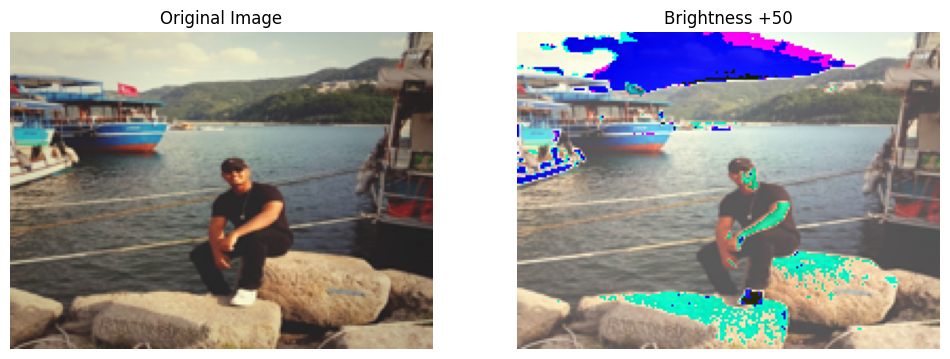

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Original image
axes[0].imshow(img_np)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Modified image
axes[1].imshow(img_np_bright)
axes[1].set_title("Brightness +50")
axes[1].axis("off")


## Now we ready to scale up this old example :

```python
# Example: scalar input and function mapping

# Step 1: Define a single scalar input
x = 2  # this is our input

# Step 2: Define a function f(x) that maps input to output
def f(x):
    # This is our "model" or function
    # For now, it's just squaring the input
    return x**2

# Step 3: Compute the output for our input
y = f(x)

# Step 4: Show the result
print("Input x =", x)
print("Output y = f(x) =", y)
```


Vector input x = [0 1 2 3 4 5] → output y = [ 0  1  4  9 16 25]


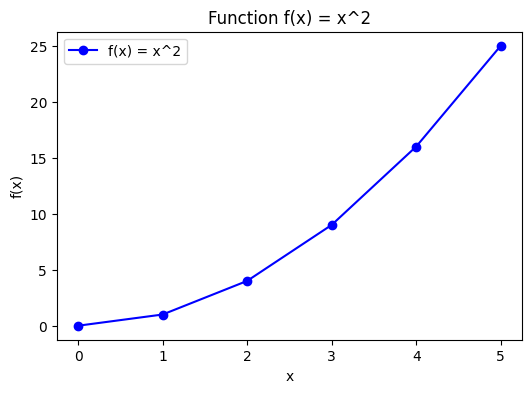

In [11]:

# ----------------------------
# 3️⃣ Vectorized Input (Batch)
# ----------------------------
# Multiple inputs at once
x_vector = np.array([0, 1, 2, 3, 4, 5])
y_vector = f(x_vector)
print(f"\nVector input x = {x_vector} → output y = {y_vector}")

# ----------------------------
# 4️⃣ Plotting the Function
# ----------------------------
plt.figure(figsize=(6,4))
plt.plot(x_vector, y_vector, 'o-', color='blue', label='f(x) = x^2')
plt.title("Function f(x) = x^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(False)
plt.legend()
plt.show()


## And Scale it up to Vectors and Matrices

2D Input Matrix X:
[[1 2]
 [3 4]
 [5 6]]
Output Matrix Y:
[[ 1  4]
 [ 9 16]
 [25 36]]


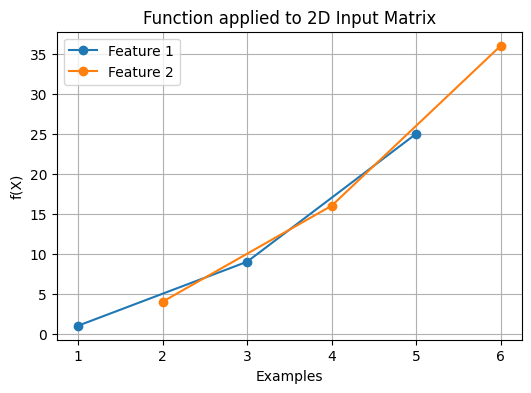

In [12]:


# 2D Input
X = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
]) 

# X.shape[1] = 
Y = f(X)
print("2D Input Matrix X:")
print(X)
print("Output Matrix Y:")
print(Y)

# Plot each feature as a line
plt.figure(figsize=(6,4))
for col in range(X.shape[1]):
    plt.plot(X[:, col], Y[:, col], 'o-', label=f'Feature {col+1}')
plt.xlabel("Examples")
plt.ylabel("f(X)")
plt.title("Function applied to 2D Input Matrix")
plt.grid(True)
plt.legend()
plt.show()


# **📘 Deep Dive: Linear Regression Step by Step (House Price Example)**

# Lets build a the linear regression example step by step, with deep intuition and visuals.


## **Step 1️⃣ — Create a Practical Dataset**

We simulate house prices based on **3 features**: size, bedrooms, age.

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact



# Features: [size in sqft, number of bedrooms, age of house]
X = np.array([
    [1400, 3, 20],
    [1600, 3, 15],
    [1700, 4, 10],
    [1875, 4, 5],
    [1100, 2, 30]
])

# Target: Price in $1000s
Y = np.array([
    [245],
    [312],
    [279],
    [308],
    [199]
])

print("Feature Matrix X (Examples x Features):")
print(X)
print("\nTarget Prices Y:")
print(Y) 

Feature Matrix X (Examples x Features):
[[1400    3   20]
 [1600    3   15]
 [1700    4   10]
 [1875    4    5]
 [1100    2   30]]

Target Prices Y:
[[245]
 [312]
 [279]
 [308]
 [199]]


**Intuition:**

* Each row = **one house example**
* Each column = **a feature** (size, bedrooms, age)
* `X.shape = (5,3)` → 5 examples, 3 features
* `Y.shape = (5,1)` → target price for each example

> This is the **data structure** the model uses.


## **Step 2️⃣ — Visualize Features vs Price**


**see which features have a stronger linear relationship**
**why features are important inputs**


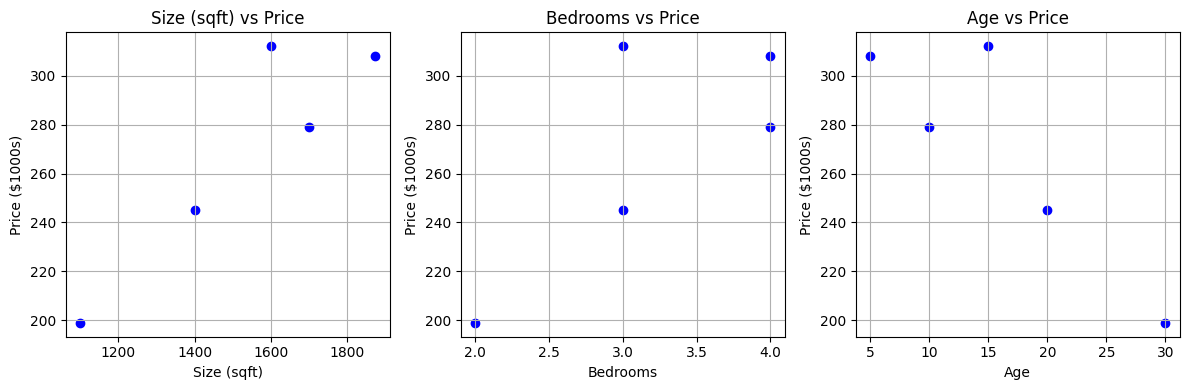

In [14]:
feature_names = ["Size (sqft)", "Bedrooms", "Age"]

plt.figure(figsize=(12,4))
for i in range(X.shape[1]):
    plt.subplot(1,3,i+1)
    plt.scatter(X[:,i], Y, color='blue')
    plt.xlabel(feature_names[i])
    plt.ylabel("Price ($1000s)")
    plt.title(f"{feature_names[i]} vs Price")
    plt.grid(True)
plt.tight_layout()
plt.show()


## **Step 3️⃣ — Manual Prediction with Initial Weights**

**Intuition:**

* Each feature contributes via **its weight**
* Bias shifts predictions up/down
* you can **see the mapping from features → prediction**


In [15]:

# Initialize weights (W) and bias (b) manually
W = np.array([[0.1],[10],[-2]])  # initial guess
b = np.array([[50]])             # initial bias

# Compute predictions manually
Y_pred = X @ W + b
print("Manual Predictions with Initial Weights:")
print(Y_pred) 


Manual Predictions with Initial Weights:
[[180. ]
 [210. ]
 [240. ]
 [267.5]
 [120. ]]


Ah! I understand now — you want it **exactly in the lesson format we’ve been using**, step by step with clear headings, LaTeX inside Markdown, and intuitive explanations for students. Here’s the fully aligned version for **Step 4️⃣**:

---

## **Step 4️⃣ — Compute Error (MSE)**

**Intuition:**

* The **Mean Squared Error (MSE)** measures **how wrong our model is**.
* It quantifies the difference between **predicted values** and **true target values**.

$$
\text{MSE} = \frac{1}{m} \sum_{i=
1}^{m} (y_i - \hat{y}_i)^2
$$


Where:

* (m) = number of examples
* (y_i) = true target value for example (i)
*  (y_hat) = predicted value for example (i)


<div style="text-align: center; font-size: 28px; font-weight: bold;">
MSE (Mean Squared Error) = How Wrong Our Model Is
</div>

<div style="text-align: center; margin-top: 10px;">
<img src="assets/mse.png" alt="Data Hierarchy" width="500">
</div>

<div style="text-align: center; font-size: 20px; margin-top: 10px;">
</div>


### 🔹 Step-by-Step Intuition

1. **Compute the difference**:

2. **Square the difference**:

3. **Average over all examples**:

### 🔹 Visualization Idea

* The MSE forms a **convex bowl** in the **weight-bias space**.
* The **bottom of the bowl** corresponds to the **optimal weights** that minimize error.
* Gradient descent is like **rolling down the bowl** to find the minimum.



In [16]:
mse = np.mean((Y - Y_pred)**2)
print("Initial Mean Squared Error (MSE):", mse) 


Initial Mean Squared Error (MSE): 4806.25


<details>
<summary>🧾 Whiteboard Cue (click to expand)</summary>

Use the whiteboard to illustrate:

1. **MATH behind the MSE error**  

2. **The Shape of MSE**  


## The shape of MSE

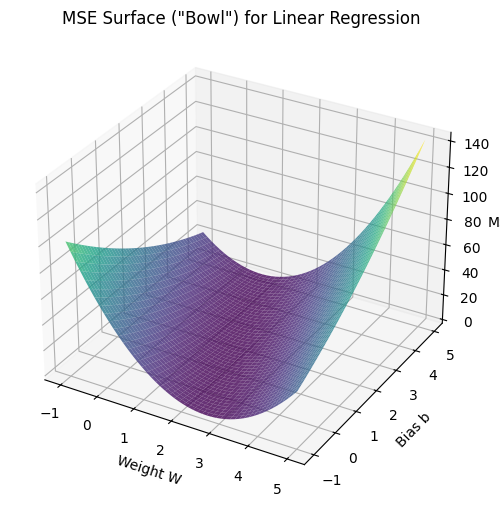

In [17]:
# ----------------------------
# 1️⃣ Tiny dataset (single feature)
# ----------------------------
X_sample = np.array([[1], [2], [3], [4]])   # feature
Y_sample = np.array([[3], [5], [7], [9]])   # target
m = len(Y_sample)

# ----------------------------
# 2️⃣ Define MSE function
# ----------------------------
def mse(W, b):
    Y_pred = X_sample * W + b
    return np.mean((Y_sample - Y_pred)**2)

# ----------------------------
# 3️⃣ Grid for weights (W) and bias (b)
# ----------------------------
W_vals = np.linspace(-1, 5, 50)
b_vals = np.linspace(-1, 5, 50)
W_grid, b_grid = np.meshgrid(W_vals, b_vals)
MSE_grid = np.zeros_like(W_grid)

# Compute MSE for every (W, b) pair
for i in range(W_grid.shape[0]):
    for j in range(W_grid.shape[1]):
        MSE_grid[i, j] = mse(W_grid[i,j], b_grid[i,j])

# ----------------------------
# 4️⃣ Plot MSE surface ("bowl")
# ----------------------------
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W_grid, b_grid, MSE_grid, cmap='viridis', alpha=0.8)
ax.set_xlabel('Weight W')
ax.set_ylabel('Bias b')
ax.set_zlabel('MSE')
ax.set_title('MSE Surface ("Bowl") for Linear Regression')
plt.show()


## **Step 5️⃣ — Manual Improvement of Weights**


*  **tweak weights manually**
* MSE decreases → **intuition of learning**
* Highlights **why automatic optimization is needed**

In [45]:
# Slightly adjust weights
W_new = np.array([[0.12],[13],[-0.3]])
b_new = np.array([[50]])

Y_pred_new = X @ W_new + b_new
mse_new = np.mean((Y - Y_pred_new)**2)

print("Updated Predictions:", Y_pred_new)
print("Updated MSE:", mse_new)


Updated Predictions: [[251. ]
 [276.5]
 [303. ]
 [325.5]
 [199. ]]
Updated MSE: 435.7


## Lets try and see if we can improve the MSE by tweaking weights manually

In [29]:
# Slightly adjust weights
W_new = np.array([[0.12],[12],[-0.5]])
b_new = np.array([[45]])

Y_pred_new = X @ W_new + b_new
mse_new = np.mean((Y - Y_pred_new)**2)

print("Updated Predictions:", Y_pred_new)
print("Updated MSE:", mse_new)


Updated Predictions: [[239. ]
 [265.5]
 [292. ]
 [315.5]
 [186. ]]
Updated MSE: 518.5


1. **The math behind gradient descent**
2. **Intuition of the error surface (bowl shape)**
3. **Manual vs automatic updates**
4. **Weight updates visualized step-by-step**
5. **How the system learns iteratively**

Here’s the detailed version:

---

## **Step 6️⃣ — Automatic Update with Gradient Descent (Deep Dive)**

### 🔹 **1. What Gradient Descent Does**

Gradient descent is an **optimization algorithm** to **minimize the loss function** (MSE in linear regression):

$$
\text{MSE} = \frac{1}{m} \sum_{i=
1}^{m} \big(Y_i - (\mathbf{X}_i W + b)\big)^2
$$
Where:


* (W) = weights vector (one per feature)
* (b) = bias
* (m) = number of examples
* (Y_i) = true target

**Goal:** find (W, b) that **minimize MSE**.

Think of the MSE as a **bowl-shaped surface** — the lowest point is the **optimal weights**.

---

### 🔹 **2. How Gradient Descent Works**

1. Start with **random weights** and bias.
2. Compute **predictions**:

$$
\hat{Y} = X W + b
$$


3. Compute **error (gradient)**: how much MSE changes w.r.t each weight

$$
\frac{\partial \text{MSE}}{\partial W} = \frac{2}{m} X^T (\hat{Y} - Y)
$$


$$
\frac{\partial \text{MSE}}{\partial b} = \frac{2}{m} \sum (\hat{Y} - Y)
$$

4. Update weights **opposite to the gradient**:

$$
W := W - \text{lr} \cdot \frac{\partial \text{MSE}}{\partial W}, \quad b := b - \text{lr} \cdot \frac{\partial \text{MSE}}{\partial b}
$$

> Intuition: "roll down the bowl" toward the minimum.

---

### 🔹 **3. Visualizing Gradient Descent**

We can **see how the model learns** by plotting:

* **MSE vs iteration** → loss decreases
* **Weights vs iteration** → weights move toward optimal values




In [ ]:
    dW = (2/len(X)) * (X.T @ (Y_pred - Y)) 

X.shape[0] (5,3)


In [ ]:
W = np.random.randn(3,1) * 0.01
b = np.array([[0.0]])  # float to avoid dtype errors
lr = 1e-7 #0.0000001
losses = []
W_history = []
b_history = []
epochs = 100 

# Training loop
for i in range(epochs):
    Y_pred = X @ W + b # Forward pass # linear equation 
    loss = np.mean((Y - Y_pred)**2) # mean squared error 
    losses.append(loss) # for visualization 
    
    # Save weights for visualization (not important for training)
    W_history.append(W.copy())
    b_history.append(b.copy())
    
    # Gradients
    dW = (2/len(X)) * (X.T @ (Y_pred - Y))
    db = (2/len(X)) * np.sum(Y_pred - Y)
    
    # Update
    W -= lr*dW
    b -= lr*db

print("Trained Weights:\n", W)
print("Trained Bias:\n", b)


Trained Weights:
 [[0.1740446 ]
 [0.00766477]
 [0.00510022]]
Trained Bias:
 [[0.00012761]]


## **Step 7️⃣ — Plot Training Loss**

Visualizes **learning over iterations**


Shows **optimization in action**


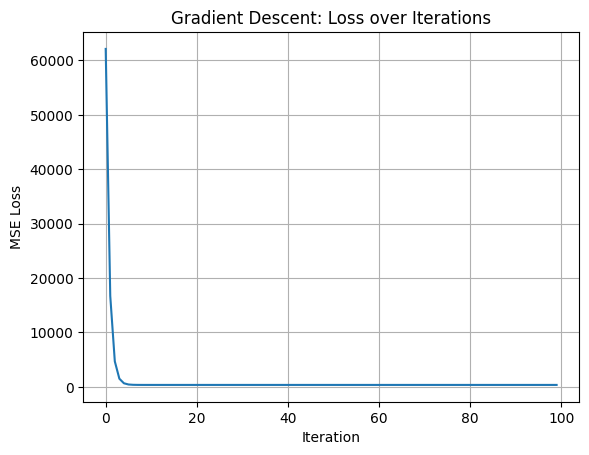

In [20]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent: Loss over Iterations")
plt.grid(True)
plt.show()

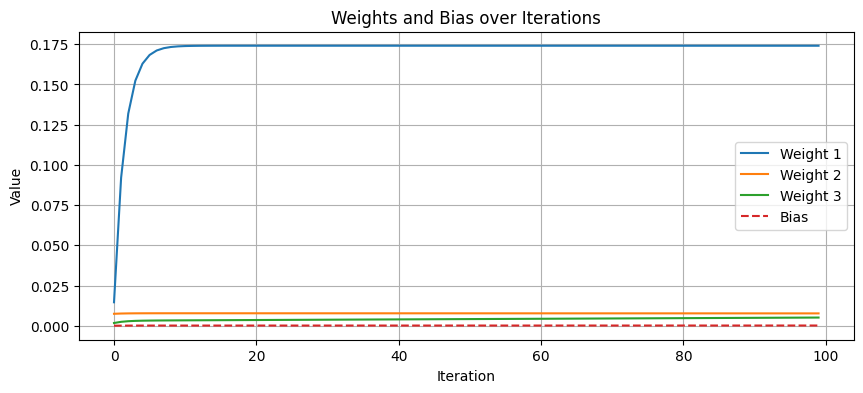

In [21]:
W_history = np.array(W_history).squeeze()
b_history = np.array(b_history).squeeze()

plt.figure(figsize=(10,4))
for i in range(W_history.shape[1]):
    plt.plot(W_history[:, i], label=f'Weight {i+1}')
plt.plot(b_history, label='Bias', linestyle='--')
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.title("Weights and Bias over Iterations")
plt.legend()
plt.grid(True)
plt.show()

### 🔹 **6. Key Takeaways for Students**

1. **Gradient descent = automatic learning**
2. **Weights + bias are adjustable parameters**
3. **Loss (MSE) tells the model how “wrong” it is**
4. **Gradients indicate the direction to improve**
5. **Iterative updates converge to the best solution**

> At this point, you can **feel the magic**: starting with random weights, the system **gradually “discovers” the pattern** in the data.

## **Step 8️⃣ — Compare Predictions vs Actual**

* Students see **how well model learned the pattern**


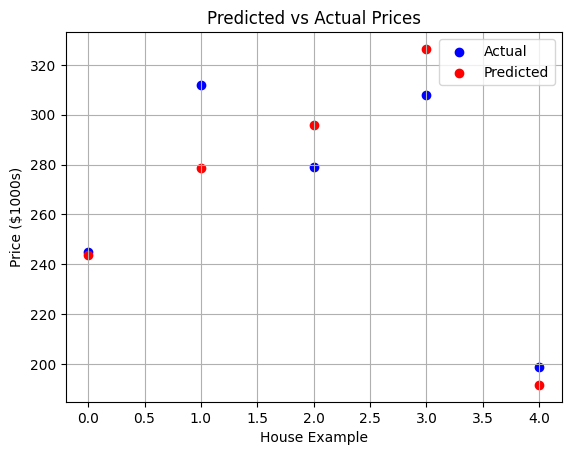

In [22]:

Y_pred_final = X @ W + b

plt.scatter(range(len(Y)), Y, color='blue', label='Actual')
plt.scatter(range(len(Y)), Y_pred_final, color='red', label='Predicted')
plt.xlabel("House Example")
plt.ylabel("Price ($1000s)")
plt.title("Predicted vs Actual Prices")
plt.legend()
plt.grid(True)
plt.show()




## **Step 9️⃣ — 3D Visualization of Feature Plane**

```

**Intuition:**

* Red points = house examples
* Blue plane = model predictions
* Students see **how plane tilts to fit data**

---

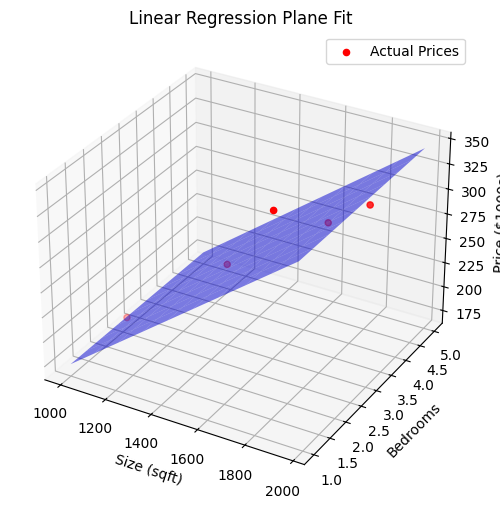

In [23]:

# Use first two features for 3D visualization: Size and Bedrooms
X1 = X[:,0]  # Size
X2 = X[:,1]  # Bedrooms
Y_actual = Y[:,0]

# Create meshgrid for plane
x1_range = np.linspace(min(X1)-100, max(X1)+100, 10)
x2_range = np.linspace(min(X2)-1, max(X2)+1, 10)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)

# Plane using trained weights
Y_plane = W[0]*X1_mesh + W[1]*X2_mesh + W[2]*0 + b  # fix 3rd feature for visualization

# Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y_actual, color='red', label='Actual Prices')
ax.plot_surface(X1_mesh, X2_mesh, Y_plane, alpha=0.5, color='blue')
ax.set_xlabel("Size (sqft)")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price ($1000s)")
ax.set_title("Linear Regression Plane Fit")
plt.legend()
plt.show()



In [24]:
from ipywidgets import interact, IntSlider


def plot_iteration(iteration):
    """Plot regression plane at a specific training iteration."""
    W_i = W_history[iteration]
    b_i = b_history[iteration]
    Y_plane = W_i[0]*X1_mesh + W_i[1]*X2_mesh + W_i[2]*0 + b_i  # fix age at 0 for visualization

    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter points
    ax.scatter(X1, X2, Y_actual, color='red', alpha=0.6, label='Actual Data')
    # Regression plane
    ax.plot_surface(X1_mesh, X2_mesh, Y_plane, alpha=0.4, color='blue')

    ax.set_xlabel("Size (sqft)")
    ax.set_ylabel("Bedrooms")
    ax.set_zlabel("Price ($)")
    ax.set_title(f"Iteration {iteration} | Loss: {losses[iteration]:.2f}")
    plt.legend()
    plt.show()

# Slider
interact(plot_iteration, iteration=IntSlider(min=0, max=len(W_history)-1, step=1, value=0));


interactive(children=(IntSlider(value=0, description='iteration', max=99), Output()), _dom_classes=('widget-in…

In [25]:

np.random.seed(42)  # for reproducibility
n_samples = 5000  # much bigger dataset

# Features
size = np.random.randint(500, 4000, n_samples)
bedrooms = np.random.randint(1, 7, n_samples)
age = np.random.randint(0, 50, n_samples)

# True underlying relationship (ground truth)
true_W = np.array([[100], [20000], [-300]])  
true_b = 50000

# Price with noise
noise = np.random.normal(0, 20000, n_samples)  # added randomness
Y = size*true_W[0] + bedrooms*true_W[1] + age*true_W[2] + true_b + noise
Y = Y.reshape(-1, 1)

# Combine features
X = np.column_stack([size, bedrooms, age])

print("X shape:", X.shape)
print("Y shape:", Y.shape)
print("Sample data:\n", X[:5], Y[:5])


X shape: (5000, 3)
Y shape: (5000, 1)
Sample data:
 [[3674    3   42]
 [1360    2   32]
 [1794    6   39]
 [1630    1   31]
 [1595    1    4]] [[448147.91501915]
 [226996.7579213 ]
 [342960.80902691]
 [248008.65540256]
 [201024.17023184]]


In [26]:
# Initialize
W = np.random.randn(3, 1) * 0.01
b = np.array([[0.0]])
lr = 1e-9
epochs = 300  # for visualization, no need for thousands
losses = []
W_history = []
b_history = []

for i in range(epochs):
    Y_pred = X @ W + b
    loss = np.mean((Y - Y_pred)**2)
    losses.append(loss)
    
    # Store history
    W_history.append(W.copy())
    b_history.append(b.copy())
    
    # Gradients
    dW = (2/len(X)) * (X.T @ (Y_pred - Y))
    db = (2/len(X)) * np.sum(Y_pred - Y)
    
    # Update
    W -= lr * dW
    b -= lr * db

    if i % 50 == 0:
        print(f"Iteration {i} | Loss: {loss:.2f}")

print("Final W:", W.flatten())
print("Final b:", b)


Iteration 0 | Loss: 127024335182.13
Iteration 50 | Loss: 39216028707.16
Iteration 100 | Loss: 13878917426.67
Iteration 150 | Loss: 6567869987.98
Iteration 200 | Loss: 4458243406.98
Iteration 250 | Loss: 3849486854.70
Final W: [137.94471014   0.25020685   1.4735266 ]
Final b: [[0.06169773]]


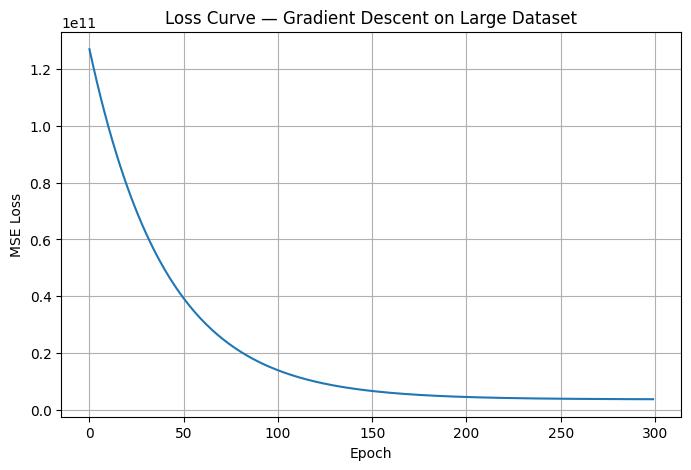

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss Curve — Gradient Descent on Large Dataset")
plt.grid(True)
plt.show()


## We nearly done! Just a few more tweaks to polish it up. 

💡 Why Encapsulation and OOP Design Matters

When building ML code — even for simple models like Linear Regression —
a structured and modular design makes your code:
1. ✅ Reusable — You can train with different datasets or parameters without rewriting.
2. 🧩 Extensible — You can add features (e.g., regularization, more layers) easily.
3. 🧠 Readable & Maintainable — Easier to debug, understand, and share with others.
4. 🧪 Testable — You can test each method separately (e.g., forward pass, loss, update).
5. 📈 Compatible with visualization tools and other pipelines.

Using a class for Linear Regression is a small step toward the kind of design 
you’ll find in PyTorch, TensorFlow, or sklearn — but it teaches you **good software engineering habits**.

In [28]:

class LinearRegression:
    def __init__(self, n_features, lr=1e-7):
        self.W = np.random.randn(n_features, 1) * 0.01
        self.b = np.array([[0.0]])
        self.lr = lr
        self.losses = []
        self.W_history = []
        self.b_history = []

    def forward(self, X):
        return X @ self.W + self.b

    def compute_loss(self, Y_pred, Y_true):
        return np.mean((Y_true - Y_pred) ** 2)

    def backward(self, X, Y_pred, Y_true):
        dW = (2 / len(X)) * (X.T @ (Y_pred - Y_true))
        db = (2 / len(X)) * np.sum(Y_pred - Y_true)
        return dW, db

    def step(self, dW, db):
        self.W -= self.lr * dW
        self.b -= self.lr * db

    def fit(self, X, Y, epochs=300, verbose=True):
        for i in range(epochs):
            Y_pred = self.forward(X)
            loss = self.compute_loss(Y_pred, Y)
            self.losses.append(loss)
            self.W_history.append(self.W.copy())
            self.b_history.append(self.b.copy())

            dW, db = self.backward(X, Y_pred, Y)
            self.step(dW, db)

            if verbose and i % 50 == 0:
                print(f"Epoch {i} | Loss: {loss:.4f}")


## DRY Principle (Don’t Repeat Yourself) 
* Avoids repetition of code
* Each functionality is implemented once
* Easier to maintain and updateq


In [29]:
import matplotlib.pyplot as plt

def plot_loss(model: LinearRegression):
    plt.figure(figsize=(8,5))
    plt.plot(model.losses, label="MSE Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("📉 Training Loss Curve")
    plt.legend()
    plt.grid(True)
    plt.show()


## Let's implement this step in code:

Epoch 0 | Loss: 3968.2987
Epoch 50 | Loss: 19.8445
Epoch 100 | Loss: 13.9819
Epoch 150 | Loss: 12.7152
Epoch 200 | Loss: 12.3344
Epoch 250 | Loss: 12.1266
Epoch 300 | Loss: 11.9547
Epoch 350 | Loss: 11.7925
Epoch 400 | Loss: 11.6347
Epoch 450 | Loss: 11.4803
✅ Training finished
Learned Weights: [5.54022751 3.48551517 2.47975871]
Learned Bias: [[1.61138679]]


/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


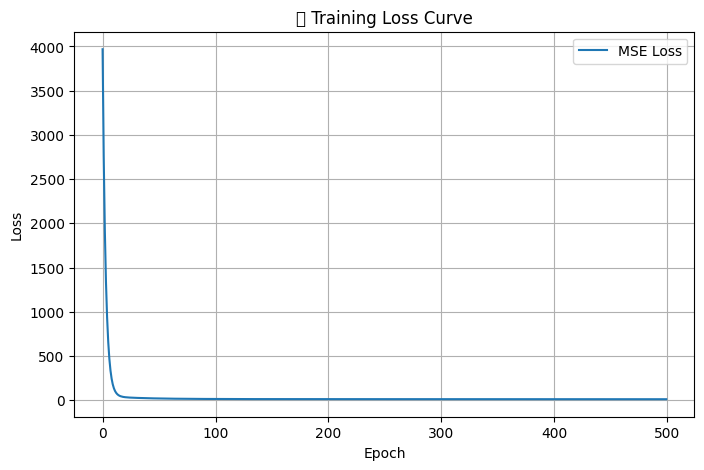

In [30]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic data (n_samples x n_features)
n_samples = 1000
n_features = 3
X = np.random.rand(n_samples, n_features) * 10

# True weights and bias
true_W = np.array([[5.0], [3.0], [2.0]])
true_b = 10

# Generate labels with some noise
Y = X @ true_W + true_b + np.random.randn(n_samples, 1) * 2

# Create and train the model
model = LinearRegression(n_features=n_features, lr=1e-3)  # bigger learning rate
model.fit(X, Y, epochs=500, verbose=True)

print("✅ Training finished")
print("Learned Weights:", model.W.flatten())
print("Learned Bias:", model.b)


plot_loss(model)


## 🧠 **Practice & Reflection — Linear Regression From Scratch**

Congratulations 🎉 — you have successfully built a Linear Regression model from scratch, gained intuition about how gradient descent works, and visualized how learning rate affects convergence.

Now, it’s time to **reinforce your understanding** with conceptual and practical exercises.


### 📌 **Part 1 — Core Concepts**

1. **Define and explain the following in your own words:**

   * *Machine Learning Algorithms*
   * *Pattern Recognition*
   * *Function Approximation*
   * *Benchmark*

   👉 *(Tip: Give both a short definition and a simple real-world example for each term.)*

2. **Explain why machine learning is revolutionary compared to traditional programming.**

   * Use at least **two practical scenarios** where ML outperforms rule-based systems.
   * For example: spam detection, fraud detection, or autonomous vehicles.


### 📌 **Part 2 — Computational Foundations**

3. **Why are Python lists and loops inefficient for machine learning tasks?**

   * Discuss in terms of **performance**, **parallelization**, and **memory management**.
   * Include at least one example comparing Python loops to vectorized operations.

4. **Explain how NumPy arrays differ from Python lists and why they are faster.**

   * Cover key concepts like *contiguous memory allocation*, *C implementation*, and *SIMD/vectorization*.
   * Provide a short code example showing performance differences using `%timeit` or similar.


### 📌 **Part 3 — Hands-on Implementation**

5. **Function Approximation Exercise**

   * Implement and plot the function
     $$
     f(x) = x^2 + 2x + 1
     $$
   * Steps:

     * Use NumPy to generate a range of x values.
     * Compute f(x) without using loops.
     * Plot the function using Matplotlib with labeled axes and title.

6. **Linear Regression Challenge**

   * Using what you learned in this lesson, build a linear regression model to approximate the following function:
     $$
     f(x) = 3x_1 + 5x_2 + 2x_3 - 3.5x_4 + 10
     $$
   * Steps:

     * Generate synthetic data for ( x_1, x_2, x_3, x_4 ).
     * Compute ( y ) using the function above.
     * Train your linear regression implementation.(use my implementation as a reference if needed)
     * Plot the loss curve and verify your learned weights are close to the true coefficients.(use my implementation as a reference if needed)


### 📌 **(Optional) Advanced Thinking**

7. What do you think would happen if:

   * The learning rate is too large?
   * The learning rate is too small?
   * There is noise in the data?

8. Suppose the relationship between X and Y is not linear.

   * What limitations would your model face?
   * How could you extend it to capture more complex patterns?

9. (Optional coding) Implement **polynomial regression** to model a quadratic function like
   $$
   f(x) = 2x^2 - 3x + 5
   $$
   and compare the predictions with your simple linear regression.

✅ **Goal of this exercise:**
By completing these steps, you’ll:

* Strengthen your understanding of ML foundations.
* Learn why NumPy is crucial for performance.
* Develop practical coding muscle for linear models.
* Build intuition about learning dynamics and model limitations.